In [ ]:
!pip install tensorflow numpy matplotlib opencv-python scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
train_path = '/content/drive/MyDrive/Hackathon/Naami_hackathon_data/train'
val_path = '/content/drive/MyDrive/Hackathon/Naami_hackathon_data/val'


In [ ]:
# Step 2: Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:
SIZE = 512
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(SIZE,SIZE),
    batch_size=16,
    class_mode='binary'
)

Found 549 images belonging to 2 classes.


In [ ]:
val_data = val_datagen.flow_from_directory(
    val_path,
    target_size=(SIZE,SIZE),
    batch_size=16,
    class_mode='binary'
)

Found 52 images belonging to 2 classes.


In [ ]:
# Step 3: Load Pretrained Model (Transfer Learning)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE,SIZE, 3))
base_model.trainable = True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Step 4: Define the Model Architecture
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Step 5: Train the Model

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'art_differentiation_model_file.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint]


)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7446 - loss: 1.2337
Epoch 1: val_accuracy improved from -inf to 0.76923, saving model to art_differentiation_model_file.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.7473 - loss: 1.2290 - val_accuracy: 0.7692 - val_loss: 0.4754
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9053 - loss: 0.7150
Epoch 2: val_accuracy did not improve from 0.76923
35/35 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.9058 - loss: 0.7079 - val_accuracy: 0.5000 - val_loss: 0.6362
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9077 - loss: 0.6447
Epoch 3: val_accuracy did not improve from 0.76923
35/35 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - accuracy: 0.9084 - loss: 0.6403 - val_accuracy: 0.5769 - val_loss: 0.4597
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9437 - loss: 0.2414
Epoch 4: val_accuracy improved from 0.76923 to 1.00000, saving model to art_differentiation_model_file.keras
35/

In [ ]:
# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 1.0000 - loss: 0.0088
Validation Accuracy: 100.00%


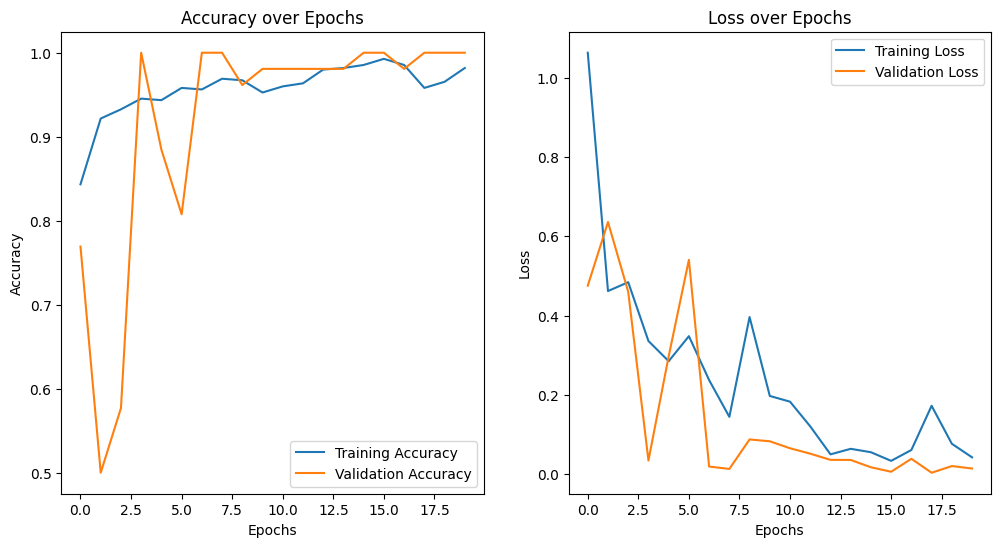

In [ ]:
# Step 7: Visualize Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# Step 8: Save the Model
model.save('art_validation_model.h5')

print("Model training complete and saved as 'art_authentication_model.h5'")


Model training complete and saved as 'art_authentication_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('art_validation_model.h5')
print("Model loaded successfully.")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(SIZE, SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)

    # Get the accuracy value (assuming it's the probability of being handmade)
    accuracy = prediction[0][0]

    # Print the accuracy for reference
    print(f"Prediction accuracy: {accuracy}")

    # Classify based on the accuracy
    if accuracy > 0.8:
        print(f"{image_path}: Highly Likely to be Original (Handmade)")
    elif 0.51 <= accuracy <= 0.8:
        print(f"{image_path}: Likely to be Original (Handmade)")
    else:
        print(f"{image_path}: Not Original (Factory-made)")


In [ ]:
predict_image('/content/drive/MyDrive/Hackathon/Naami_hackathon_data/Mix/Model_train/Mandala/1673.png', model)
